In [21]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as mplt

In [22]:
import matplotlib
%matplotlib inline

In [23]:
# Creating a function to model and create data
def func(x, a, x0, sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

In [24]:
np.exp(np.array([1,2,60]))

array([  2.71828183e+00,   7.38905610e+00,   1.14200739e+26])

In [25]:
np.array([1,2,60])

array([ 1,  2, 60])

In [26]:
# Generating clean data
x = np.linspace(0, 10, 100)
y = func(x, 1, 5, 2)

In [27]:
x.shape

(100,)

In [28]:
y.shape

(100,)

In [29]:
# Adding noise to the data
yn = y + 0.2 * np.random.normal(size=len(x))

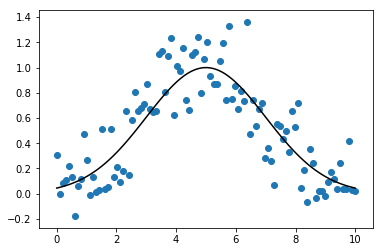

In [30]:
# Plot out the current state of the data and model
fig = mpl.figure()
ax = fig.add_subplot(111)
ax.plot(x, y, c='k', label='Function')
ax.scatter(x, yn)
fig.savefig('model_and_noise.png')

In [31]:
help(fig.add_subplot)

Help on method add_subplot in module matplotlib.figure:

add_subplot(self, *args, **kwargs) method of matplotlib.figure.Figure instance
    Add a subplot.  Examples::
    
        fig.add_subplot(111)
    
        # equivalent but more general
        fig.add_subplot(1,1,1)
    
        # add subplot with red background
        fig.add_subplot(212, facecolor='r')
    
        # add a polar subplot
        fig.add_subplot(111, projection='polar')
    
        # add Subplot instance sub
        fig.add_subplot(sub)
    
    *kwargs* are legal :class:`~matplotlib.axes.Axes` kwargs plus
    *projection*, which chooses a projection type for the axes.
    (For backward compatibility, *polar=True* may also be
    provided, which is equivalent to *projection='polar'*). Valid
    values for *projection* are: [u'aitoff', u'hammer', u'lambert', u'mollweide', u'polar', u'rectilinear'].  Some of
    these projections
    support additional *kwargs*, which may be provided to
    :meth:`add_axes`.
  

In [32]:
# Executing curve_fit on noisy data
popt, pcov = curve_fit(func, x, yn)

In [33]:
help(curve_fit)

Help on function curve_fit in module scipy.optimize.minpack:

curve_fit(f, xdata, ydata, p0=None, sigma=None, absolute_sigma=False, check_finite=True, bounds=(-inf, inf), method=None, jac=None, **kwargs)
    Use non-linear least squares to fit a function, f, to data.
    
    Assumes ``ydata = f(xdata, *params) + eps``
    
    Parameters
    ----------
    f : callable
        The model function, f(x, ...).  It must take the independent
        variable as the first argument and the parameters to fit as
        separate remaining arguments.
    xdata : An M-length sequence or an (k,M)-shaped array
        for functions with k predictors.
        The independent variable where the data is measured.
    ydata : M-length sequence
        The dependent data --- nominally f(xdata, ...)
    p0 : None, scalar, or N-length sequence, optional
        Initial guess for the parameters.  If None, then the initial
        values will all be 1 (if the number of parameters for the function
        c

In [40]:
print popt
print pcov

[ 1.04850428  4.83105524 -1.92717608]
[[  1.81627061e-03   6.69328294e-06   2.25930241e-03]
 [  6.69328294e-06   8.16085645e-03   2.92200961e-05]
 [  2.25930241e-03   2.92200961e-05   8.33324807e-03]]


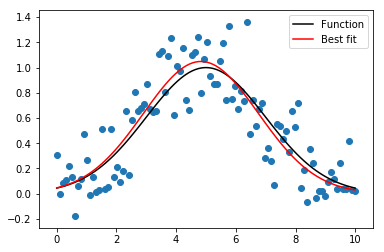

In [50]:
fig = mpl.figure()
ym = func(x, popt[0], popt[1], popt[2])
ax = fig.add_subplot(111)
ax.plot(x, y, c='k', label='Function')
ax.scatter(x, yn)
ax.plot(x, ym, c='r', label='Best fit')
ax.legend()
fig.savefig('model_fit.png')

In [51]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as mplt

In [52]:
# Let's create a function to model and create data
def func(x, a, x0, sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

In [53]:
# Generating clean data
x = np.linspace(0, 20, 200)
y1 = func(x[np.where(x <= 10)], 1, 3, 1)
y2 = func(x[np.where(x > 10)], -2, 15, 0.5)

y = np.hstack([y1, y2])

In [54]:
# Adding noise to the data
yn = y + 0.2 * np.random.normal(size=len(x))

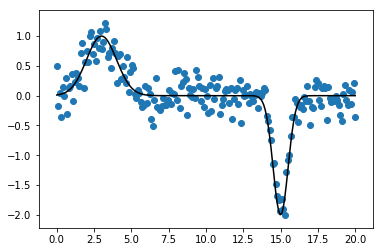

In [55]:
# Plot out the current state of the data and model
fig = mpl.figure()
ax = fig.add_subplot(111)
ax.plot(x, y, c='k', label='Function')
ax.scatter(x, yn)
fig.savefig('model_and_noise_multiple.png')

In [56]:
# Executing curve_fit on noisy data
popt, pcov = curve_fit(func, x, yn)

[ 0.93401935  2.99005238  1.11284643]


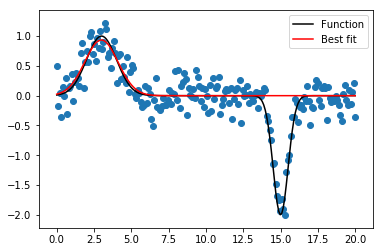

In [60]:
#popt returns the best fit values for parameters of the given model (func)
print popt

fig = mpl.figure()
ax = fig.add_subplot(111)
ax.plot(x, y, c='k', label='Function')
ax.scatter(x, yn)
ym = func(x, popt[0], popt[1], popt[2])
ax.plot(x, ym, c='r', label='Best fit')
ax.legend()
fig.savefig('model_fit_multiple.png')

In [61]:
help(ax.scatter)

Help on method scatter in module matplotlib.axes._axes:

scatter(ax, *args, **kwargs) method of matplotlib.axes._subplots.AxesSubplot instance
    Make a scatter plot of `x` vs `y`
    
    Marker size is scaled by `s` and marker color is mapped to `c`
    
    Parameters
    ----------
    x, y : array_like, shape (n, )
        Input data
    
    s : scalar or array_like, shape (n, ), optional
        size in points^2.  Default is `rcParams['lines.markersize'] ** 2`.
    
    c : color, sequence, or sequence of color, optional, default: 'b'
        `c` can be a single color format string, or a sequence of color
        specifications of length `N`, or a sequence of `N` numbers to be
        mapped to colors using the `cmap` and `norm` specified via kwargs
        (see below). Note that `c` should not be a single numeric RGB or
        RGBA sequence because that is indistinguishable from an array of
        values to be colormapped.  `c` can be a 2-D array in which the
        rows ar